<a href="https://colab.research.google.com/github/NurMohammad-collab/Nur_Mohammad/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing 

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: a5c7fae504544798b7c3532b706a32ba.asRWmqqLX9eDVaampnQDBrNk


## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response


## 🌤️ Weather Data Functions

In [4]:
# Define get_weather_data() function here
import requests

def get_weather_data(location, forecast_days=1):

    url = f"https://wttr.in/{location}?format=j1"
    response = requests.get(url)
    data = response.json()

    current = data["current_condition"][0]
    current_temp = current["temp_C"]
    current_precip = current["precipMM"]

    forecast = []
    for day in data["weather"][:forecast_days]:
        forecast.append({
            "date": day["date"],
            "avg_temp_C": day["avgtempC"],
            "total_precip_mm": day["hourly"][0]["precipMM"]
        })

    return {
        "location": location,
        "current": {
            "temperature_C": current_temp,
            "precipitation_mm": current_precip
        },
        "forecast": forecast
    }


{'location': 'Perth', 'current': {'temperature_C': '20', 'precipitation_mm': '0.0'}, 'forecast': [{'date': '2025-10-21', 'avg_temp_C': '15', 'total_precip_mm': '0.0'}, {'date': '2025-10-22', 'avg_temp_C': '15', 'total_precip_mm': '0.0'}]}


## 📊 Visualisation Functions

In [14]:
import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create a temperature graph using data from the 'forecast' section.
    """
    forecast = weather_data["forecast"]

    # Extract dates and average temperatures
    dates = [entry["date"] for entry in forecast]
    temps = [float(entry["avg_temp_C"]) for entry in forecast]

    # Plot
    plt.plot(dates, temps, marker='o', color='orange', linewidth=2)
    plt.title(f"Average Daily Temperature in {weather_data['location']}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.tight_layout()

    if output_type == 'display':
        plt.show()
    elif output_type == 'save':
        plt.savefig("temperature_plot.png")
        print("Temperature graph saved as 'temperature_plot.png'.")

    plt.close()


In [ ]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass

{'location': 'bangladesh', 'current': {'temperature_C': '27', 'precipitation_mm': '0.0'}, 'forecast': [{'date': '2025-10-21', 'avg_temp_C': '26', 'total_precip_mm': '0.0'}, {'date': '2025-10-22', 'avg_temp_C': '27', 'total_precip_mm': '0.0'}, {'date': '2025-10-23', 'avg_temp_C': '27', 'total_precip_mm': '0.0'}]}


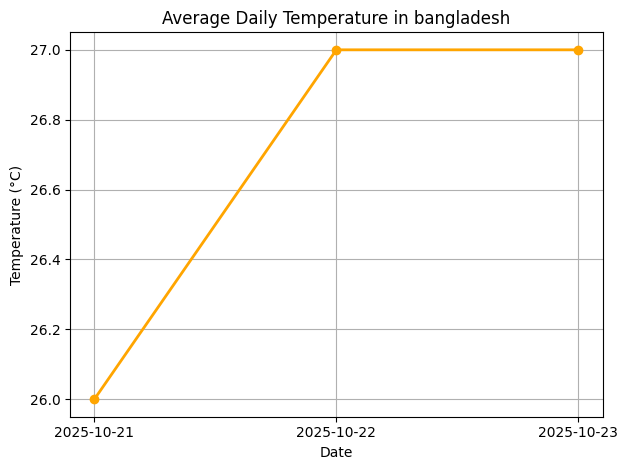

None


In [17]:
weather_data = get_weather_data('bangladesh',4)
print(weather_data)
print(create_temperature_visualisation(weather_data))

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.